In [4]:
import pandas as pd 
import numpy as np
data=pd.read_csv('task1_data1.csv')
data.head()

,x1,x2,y
0,82.5302,67.9939,0.0
1,14.3821,54.6641,NaN
2,88.9239,14.9664,NaN
3,78.0811,26.0769,NaN
4,78.1597,58.6068,NaN


In [6]:
data_result=pd.read_csv('task1_data2.csv')
data_result.head()

,x1,x2,y
0,82.5302,67.9939,0
1,14.3821,54.6641,1
2,88.9239,14.9664,0
3,78.0811,26.0769,0
4,78.1597,58.6068,0


In [8]:
#获取唯一一个有标签的数据点
X_labeled=data.iloc[0,:]
print(X_labeled,type(X_labeled))

x1    82.5302
x2    67.9939
y      0.0000
Name: 0, dtype: float64 <class 'pandas.core.series.Series'>


In [9]:
#X赋值
X=data.drop(['y'],axis=1)
X.head()

,x1,x2
0,82.5302,67.9939
1,14.3821,54.6641
2,88.9239,14.9664
3,78.0811,26.0769
4,78.1597,58.6068


In [10]:
#正确结果的赋值
y=data_result.loc[:,'y']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: y, dtype: int64

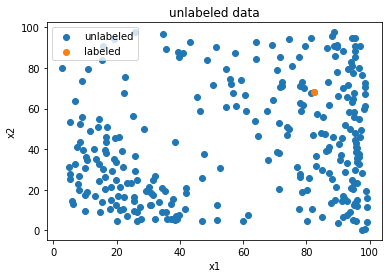

In [17]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.scatter(X.loc[:,'x1'],X.loc[:,'x2'],label='unlabeled')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.title('unlabeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

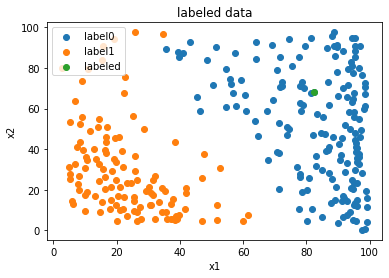

In [62]:
fig2 = plt.figure()
plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0],label='label0')
plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1],label='label1')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.title('labeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

In [20]:
#建立Kmeans模型
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=2,init='random',random_state=0)
KM.fit(X)

KMeans(init='random', n_clusters=2, random_state=0)

In [21]:
#查看聚类中心
centers=KM.cluster_centers_
print(centers)

[[82.88964583 52.50966869]
 [23.23572487 28.61664752]]


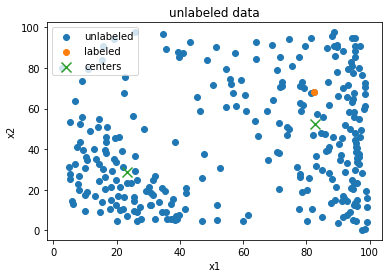

In [23]:
fig3 = plt.figure()
plt.scatter(X.loc[:,'x1'],X.loc[:,'x2'],label='unlabeled')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.scatter(centers[:,0],centers[:,1],100,marker='x',label='centers')
plt.title('unlabeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

In [25]:
#无监督聚类结果预测
y_predict=KM.predict(X)
print(y_predict)
print(pd.value_counts(y_predict))
print(pd.value_counts(y))

[0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1
 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0    168
1    117
dtype: int64
0    167
1    118
Name: y, dtype: int64


In [28]:
#准确率的计算
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y,y_predict)
print(accuracy)

0.9964912280701754


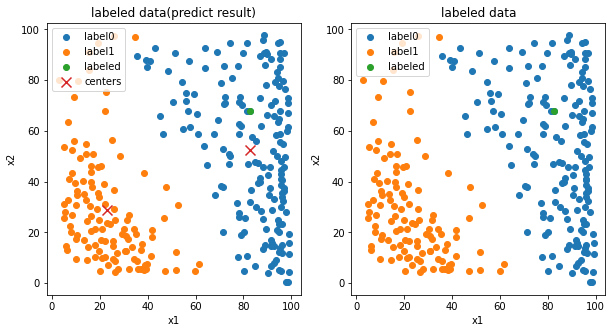

In [63]:
fig4 = plt.figure(figsize=(10,5))

fig5=plt.subplot(121)
plt.scatter(X.loc[:,'x1'][y_predict==0],X.loc[:,'x2'][y_predict==0],label='label0')
plt.scatter(X.loc[:,'x1'][y_predict==1],X.loc[:,'x2'][y_predict==1],label='label1')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.scatter(centers[:,0],centers[:,1],100,marker='x',label='centers')
plt.title('labeled data(predict result)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

fig6 = plt.subplot(122)
plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0],label='label0')
plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1],label='label1')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.title('labeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()


In [45]:
#查看第一个带有正确结果标签的样本点
print(X_labeled)
print(y_predict[0])

x1    82.5302
x2    67.9939
y      0.0000
Name: 0, dtype: float64
0


In [43]:
#结果矫正
#y_corrected=[]
#for i in y_predict:
#    if i==0:
#        y_corrected.append(1)
#    elif i==1:
#        y_corrected.append(0)
#print(y_corrected)

In [44]:
#print(pd.value_counts(y_corrected))
#print(pd.value_counts(y))

In [46]:
#KNN建模
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,y)


KNeighborsClassifier(n_neighbors=3)

In [52]:
#KNN预测
y_predict_knn=KNN.predict(X)
accuracy_knn=accuracy_score(y,y_predict_knn)
print(accuracy_knn)

1.0


In [53]:
print(pd.value_counts(y_predict_knn))
print(pd.value_counts(y))

0    167
1    118
dtype: int64
0    167
1    118
Name: y, dtype: int64


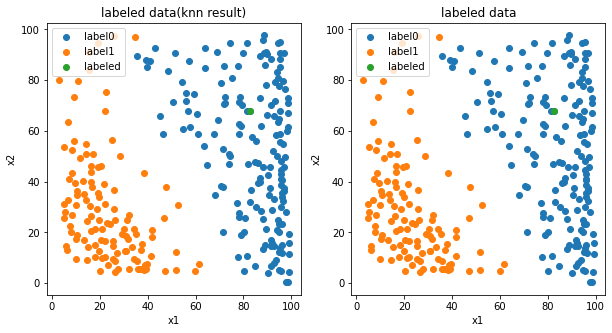

In [64]:
fig7 = plt.figure(figsize=(10,5))

fig8=plt.subplot(121)
plt.scatter(X.loc[:,'x1'][y_predict_knn==0],X.loc[:,'x2'][y_predict_knn==0],label='label0')
plt.scatter(X.loc[:,'x1'][y_predict_knn==1],X.loc[:,'x2'][y_predict_knn==1],label='label1')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.title('labeled data(knn result)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

fig9 = plt.subplot(122)
plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0],label='label0')
plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1],label='label1')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.title('labeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

In [57]:
#Kmeans 迭代一次的结果
KM2=KMeans(n_clusters=2,init='random',random_state=1,n_init=1,max_iter=1)
KM2.fit(X)
centers2=KM2.cluster_centers_
y_predict2=KM2.predict(X)


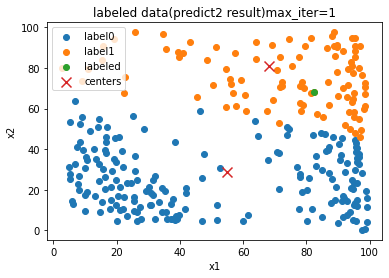

In [65]:
fig10=plt.figure()
plt.scatter(X.loc[:,'x1'][y_predict2==0],X.loc[:,'x2'][y_predict2==0],label='label0')
plt.scatter(X.loc[:,'x1'][y_predict2==1],X.loc[:,'x2'][y_predict2==1],label='label1')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.scatter(centers2[:,0],centers2[:,1],100,marker='x',label='centers')
plt.title('labeled data(predict2 result)max_iter=1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')